# mask 생성하기

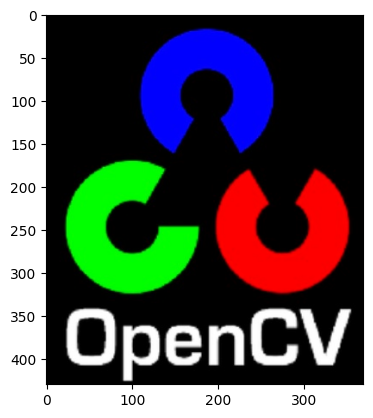

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

src = cv2.imread('opencv_logo.jpg')
plt.imshow(src)
plt.show()

In [49]:
mask = (src[:,:,0] > 200) & (src[:,:,1] < 100)
mask = (mask*255).astype(np.uint8)
print(mask.shape) 
mask_3d = mask[:,:,np.newaxis]
print(mask_3d.shape)
mask_3d  = np.repeat(mask_3d , 3, axis=2) # 3번째축을 따라 3번 반복을 한다
print(mask_3d.shape)

(430, 369)
(430, 369, 1)
(430, 369, 3)


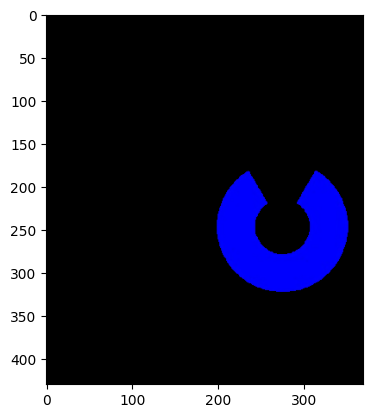

In [50]:
src_mask = src & mask_3d

plt.imshow(src_mask[:,:,::-1])
plt.show()

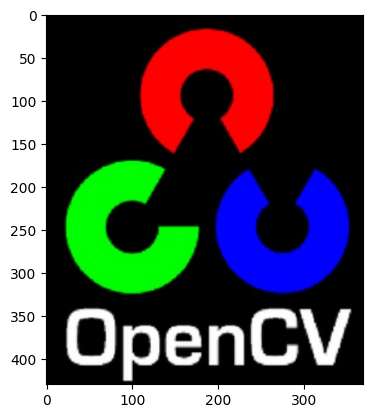

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import cv2

src = cv2.imread("opencv_logo.jpg")
# src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src[:,:,::-1])
plt.show()

(430, 369)
(430, 369, 1)
(430, 369, 3)


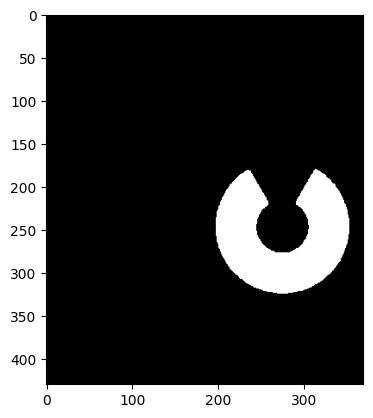

In [3]:
mask =  (src[:,:,0] > 100) & (src[:,:,2] < 100) # 파란색에 가까운것만 뽑아온다, 빨간색 채널에서 검은색에 가까운 것을 뽑아온다.
mask = (mask*255).astype(np.uint8) # 마스킹 된 부분만 흰색이 됨
print(mask.shape)
mask_3d = mask[:,:,np.newaxis]   # 3차원으로 만들어 줌 (채널이 없어서 하나를 더 만들어)
print(mask_3d.shape)
mask_3d = np.repeat(mask_3d, 3, axis=2) #3차원 마스크를 이미지의 채널 수로 복제하여 3채널 마스크로 만든다.
print(mask_3d.shape)
plt.imshow(mask_3d)

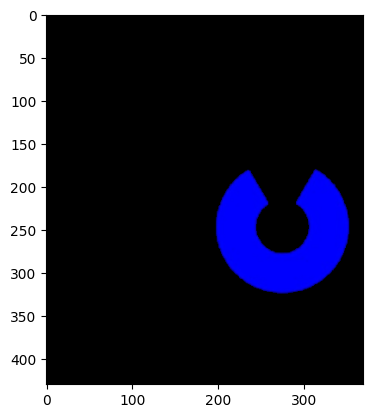

In [4]:
src_mask = src & mask_3d # 마스킹 된 부분이 흰색이라서 마스킹된 부분과 일치하는 그림 색상이 그래로 출력됨
plt.imshow(src_mask[:,:,::-1])
plt.show()

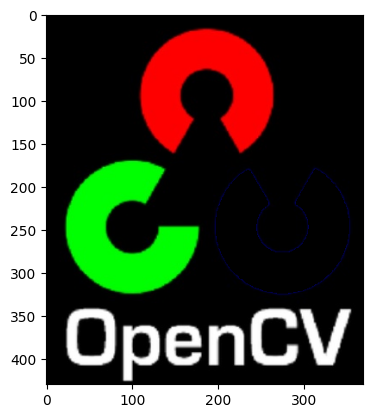

In [5]:
mask_3d = ~mask_3d # 파란색 안된 부분만 마스킹을 한다.
src_mask = src & mask_3d

plt.imshow(src_mask[:,:,::-1])
plt.show()

# mask를 이용해 두 이미지 자연스럽게 합치기

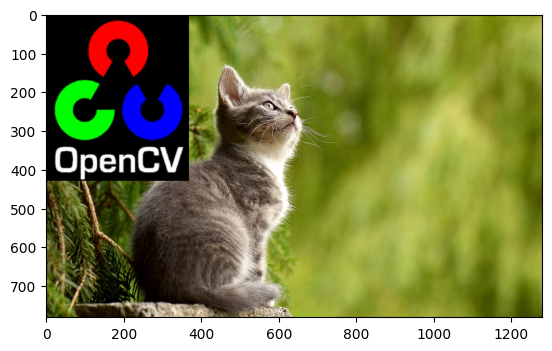

In [8]:
fg = cv2.imread("opencv_logo.jpg") #객체 
# fg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
bg = cv2.imread("cat.jpg")

h, w = fg.shape[:2] # 색상 채널은 포함 안시킬려고 0,1까지 인덱싱
final = np.copy(bg)
final[:h, :w] = fg
# bg[:h, :w] = fg + bg[:h,:w]

plt.imshow(final[:,:,::-1])

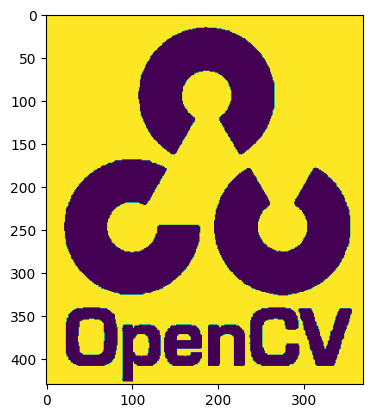

In [9]:
mask = (fg[:,:,0] < 20) & (fg[:,:,1] < 20) & (fg[:,:,2] < 20) #각 색에 검정색에 가까운것을 마스크
mask = (mask*255).astype(np.uint8)
plt.imshow(mask)

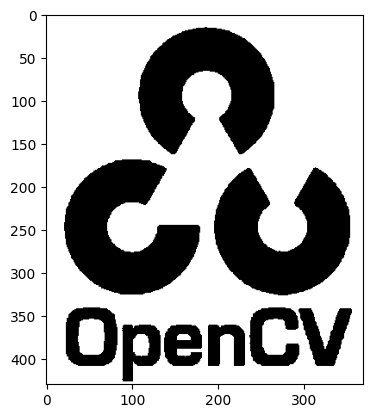

In [10]:
mask_3d = mask[:,:,np.newaxis]
mask_3d_bg = np.repeat(mask_3d, 3, axis=2)
plt.imshow(mask_3d_bg)

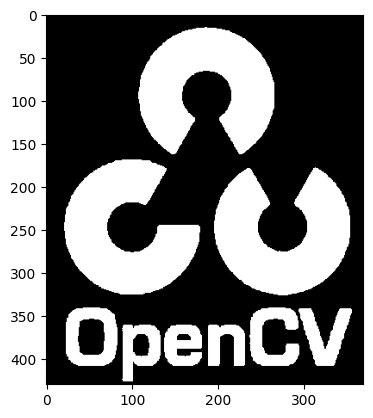

In [11]:
mask_3d_fg = ~mask_3d_bg
plt.imshow(mask_3d_fg)
plt.show()

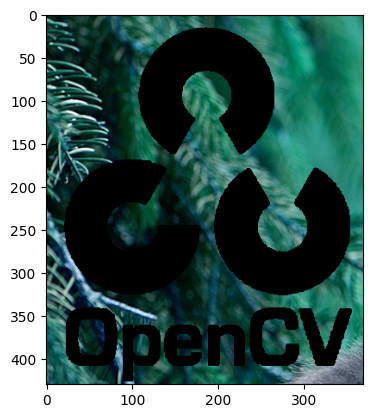

In [13]:
fg = fg & mask_3d_fg
bg[:h, :w] = bg[:h, :w] & mask_3d_bg  # 백그라운드 이미지에서 포그라운드 이미지 크기 만큼 때온 후 마스킹 된 백그라운드와 비트 연산
plt.imshow(bg[:h, :w])
plt.show()

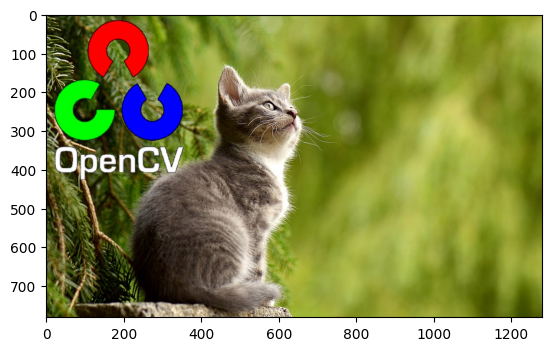

In [14]:
bg[:h, :w] = fg + bg[:h,:w]

plt.imshow(bg[:,:,::-1])
plt.show()

# 백그라운드 이미지의 중앙에 맞춰 openCV를 할려고 할때

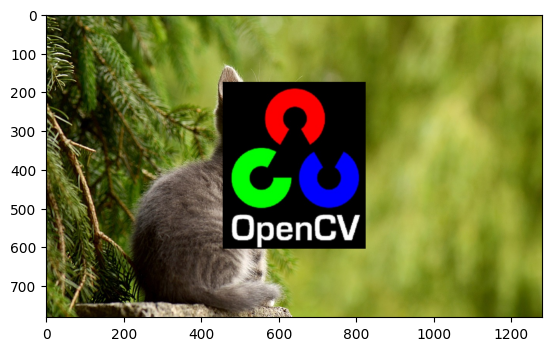

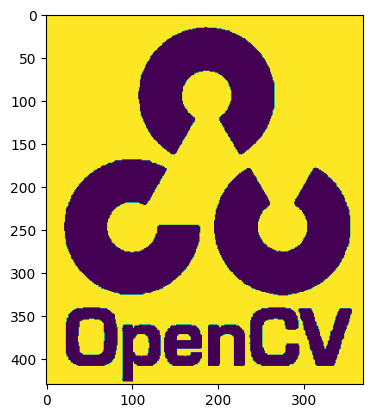

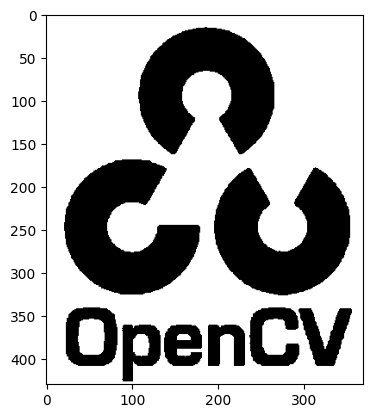

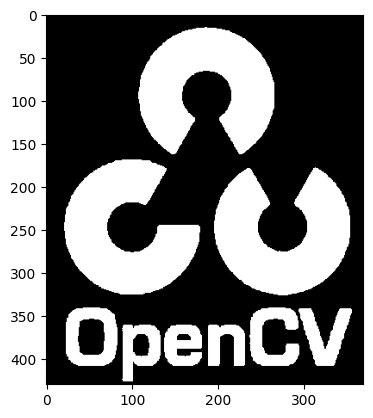

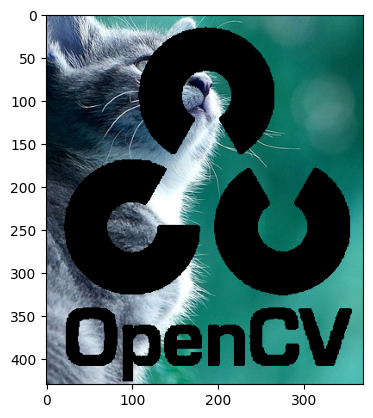

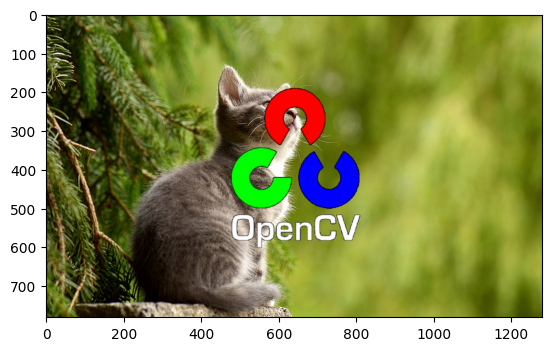

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
fg = cv2.imread("opencv_logo.jpg") #객체 
# fg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
bg = cv2.imread("cat.jpg")

h, w = fg.shape[:2] # 색상 채널은 포함 안시킬려고 0,1까지 인덱싱
final = np.copy(bg)
H,W = bg.shape[:2]


final[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = fg
# bg[:h, :w] = fg + bg[:h,:w]

plt.imshow(final[:,:,::-1])
plt.show()

mask = (fg[:,:,0] < 20) & (fg[:,:,1] < 20) & (fg[:,:,2] < 20) #각 색에 검정색에 가까운것을 마스크
mask = (mask*255).astype(np.uint8)
plt.imshow(mask)
plt.show()

mask_3d = mask[:,:,np.newaxis]
mask_3d_bg = np.repeat(mask_3d, 3, axis=2)
plt.imshow(mask_3d_bg)
plt.show()

mask_3d_fg = ~mask_3d_bg
plt.imshow(mask_3d_fg)
plt.show()

fg = fg & mask_3d_fg
bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] & mask_3d_bg  # 백그라운드 이미지에서 포그라운드 이미지 크기 만큼 때온 후 마스킹 된 백그라운드와 비트 연산
plt.imshow(bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w])
plt.show()

bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = fg + bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w]

plt.imshow(bg[:,:,::-1])
plt.show()
